In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

%matplotlib inline

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

#plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_excel('../data/tokyo-clean.xlsx')

In [3]:
data.head()

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,PricePerUnit,FloorPlan,Area,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
0,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,14000000,NaN,NaN,120,...,80.0,500.0,NaN,Dealings including private road,0,0,0,2010,2,2010-06-30
1,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,7300000,NaN,1K,20,...,80.0,600.0,Not yet,NaN,0,0,0,2010,2,2010-06-30
2,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,8200000,NaN,1K,20,...,80.0,700.0,Not yet,NaN,0,0,0,2010,2,2010-06-30
3,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,10000000,NaN,NaN,20,...,80.0,500.0,NaN,NaN,0,0,0,2010,2,2010-06-30
4,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Iwamotocho,11000000,NaN,1R,20,...,80.0,700.0,Not yet,NaN,0,0,0,2010,2,2010-06-30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607756 entries, 0 to 607755
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   PriceCategory              607756 non-null  object        
 1   Type                       607756 non-null  object        
 2   Region                     254515 non-null  object        
 3   Prefecture                 607756 non-null  object        
 4   Municipality               607756 non-null  object        
 5   DistrictName               607709 non-null  object        
 6   TradePriceYen              607756 non-null  int64         
 7   PricePerUnit               84761 non-null   float64       
 8   FloorPlan                  342108 non-null  object        
 9   Area                       607756 non-null  int64         
 10  UnitPrice                  84761 non-null   float64       
 11  LandShape                  254388 non-null  object  

In [5]:
data.describe(include='all')

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,PricePerUnit,FloorPlan,Area,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
count,607756,607756,254515,607756,607756,607709,6.077560e+05,8.476100e+04,342108,607756.000000,...,511295.000000,511289.000000,212938,35140,607756.000000,607756.000000,607756.000000,607756.000000,607756.000000,607756
unique,2,5,4,1,59,1462,NaN,NaN,66,NaN,...,NaN,NaN,2,22,NaN,NaN,NaN,NaN,NaN,NaN
top,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",Residential Area,東京都 (Tokyo),世田谷区 (Setagaya Ward),Honcho,NaN,NaN,3LDK,NaN,...,NaN,NaN,Not yet,Dealings including private road,NaN,NaN,NaN,NaN,NaN,NaN
freq,492757,328363,227625,607756,37923,4028,NaN,NaN,95570,NaN,...,NaN,NaN,152846,26988,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.537508e+07,1.509384e+06,NaN,121.813279,...,62.059359,262.802466,NaN,NaN,0.000428,0.001897,0.001932,2018.332709,2.453297,2018-12-10 14:58:35.910989824
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,1.300000e+01,NaN,10.000000,...,20.000000,15.000000,NaN,NaN,0.000000,0.000000,0.000000,2010.000000,1.000000,2010-03-31 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+07,6.700000e+05,NaN,45.000000,...,60.000000,150.000000,NaN,NaN,0.000000,0.000000,0.000000,2014.000000,1.000000,2014-12-31 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+07,1.200000e+06,NaN,70.000000,...,60.000000,200.000000,NaN,NaN,0.000000,0.000000,0.000000,2019.000000,2.000000,2019-09-30 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+07,1.900000e+06,NaN,105.000000,...,80.000000,300.000000,NaN,NaN,0.000000,0.000000,0.000000,2022.000000,3.000000,2022-12-31 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+11,1.000000e+08,NaN,9999.000000,...,501.000000,4080.000000,NaN,NaN,1.000000,1.000000,1.000000,2025.000000,4.000000,2025-06-30 00:00:00


In [6]:
# extremes may be errors - to be removed

data.iloc[data.TradePriceYen.sort_values(ascending=False).head(20).index]

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,PricePerUnit,FloorPlan,Area,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
318303,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),新宿区 (Shinjuku Ward),Nishishinjuku,170000000000,NaN,NaN,9999,...,80.0,1000.0,NaN,NaN,0,1,1,2020,4,2020-12-31
32247,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),港区 (Minato Ward),Akasaka,61000000000,NaN,NaN,9999,...,80.0,500.0,NaN,NaN,0,1,1,2011,4,2011-12-31
60296,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),中央区 (Chuo Ward),Harumi,32000000000,NaN,NaN,9999,...,60.0,400.0,NaN,NaN,0,1,1,2012,4,2012-12-31
287438,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),文京区 (Bunkyo Ward),Kasuga,31000000000,NaN,NaN,810,...,80.0,600.0,NaN,NaN,0,0,1,2019,2,2019-06-30
254190,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),港区 (Minato Ward),Akasaka,30000000000,NaN,NaN,9999,...,80.0,500.0,NaN,NaN,0,1,1,2018,1,2018-03-31
415336,Real Estate Transaction Price Information,Residential Land(Land Only),Commercial Area,東京都 (Tokyo),港区 (Minato Ward),Shimbashi,30000000000,55000000.0,NaN,1800,...,80.0,700.0,NaN,NaN,0,0,0,2022,4,2022-12-31
259997,Real Estate Transaction Price Information,Residential Land(Land and Building),Residential Area,東京都 (Tokyo),品川区 (Shinagawa Ward),Higashioi,27000000000,NaN,NaN,9999,...,60.0,200.0,NaN,NaN,0,1,1,2018,1,2018-03-31
102959,Real Estate Transaction Price Information,Residential Land(Land Only),Commercial Area,東京都 (Tokyo),渋谷区 (Shibuya Ward),Jinguumae,27000000000,30000000.0,NaN,9999,...,80.0,500.0,NaN,NaN,0,0,0,2013,2,2013-06-30
424747,Real Estate Transaction Price Information,Residential Land(Land and Building),Residential Area,東京都 (Tokyo),江東区 (Koto Ward),Shinonome,26000000000,NaN,NaN,9999,...,60.0,300.0,NaN,NaN,0,1,1,2022,1,2022-03-31
470069,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),港区 (Minato Ward),Minamiaoyama,25000000000,NaN,NaN,1800,...,60.0,300.0,NaN,NaN,0,0,1,2023,2,2023-06-30


In [7]:
data.isnull().sum()

PriceCategory                     0
Type                              0
Region                       353241
Prefecture                        0
Municipality                      0
DistrictName                     47
TradePriceYen                     0
PricePerUnit                 522995
FloorPlan                    265648
Area                              0
UnitPrice                    522995
LandShape                    353368
Frontage                     375788
TotalFloorArea               421396
BuildingYear                 103788
Structure                    100486
Use                          240258
Purpose                      271351
RoadDirection                332884
Classification               335066
Breadth                      337328
CityPlanning                  14005
CoverageRatio                 96461
FloorAreaRatio                96467
Renovation                   394818
Remarks                      572616
BuildingYearFloored               0
FrontageCapped              

In [8]:
# numerical columns

for col in data.select_dtypes(include='number').columns:
    print(col)

TradePriceYen
PricePerUnit
Area
UnitPrice
Frontage
TotalFloorArea
BuildingYear
Breadth
CoverageRatio
FloorAreaRatio
BuildingYearFloored
FrontageCapped
TotalFloorAreaCapped
TransactionYear
TransactionQuarter


In [9]:
# categorical columns

for col in data.select_dtypes(include='object').columns:
    print(col)

PriceCategory
Type
Region
Prefecture
Municipality
DistrictName
FloorPlan
LandShape
Structure
Use
Purpose
RoadDirection
Classification
CityPlanning
Renovation
Remarks


In [10]:
data.nunique().sort_values()

Prefecture                      1
PriceCategory                   2
TotalFloorAreaCapped            2
FrontageCapped                  2
BuildingYearFloored             2
Renovation                      2
Region                          4
TransactionQuarter              4
Type                            5
Purpose                         6
LandShape                       9
RoadDirection                   9
Classification                 15
TransactionYear                16
CityPlanning                   16
Remarks                        22
Structure                      25
CoverageRatio                  40
Municipality                   59
TransactionQuarterEndDate      62
FloorPlan                      66
BuildingYear                   83
FloorAreaRatio                120
TotalFloorArea                156
Area                          202
Use                           215
Breadth                       402
PricePerUnit                  413
UnitPrice                     419
Frontage      

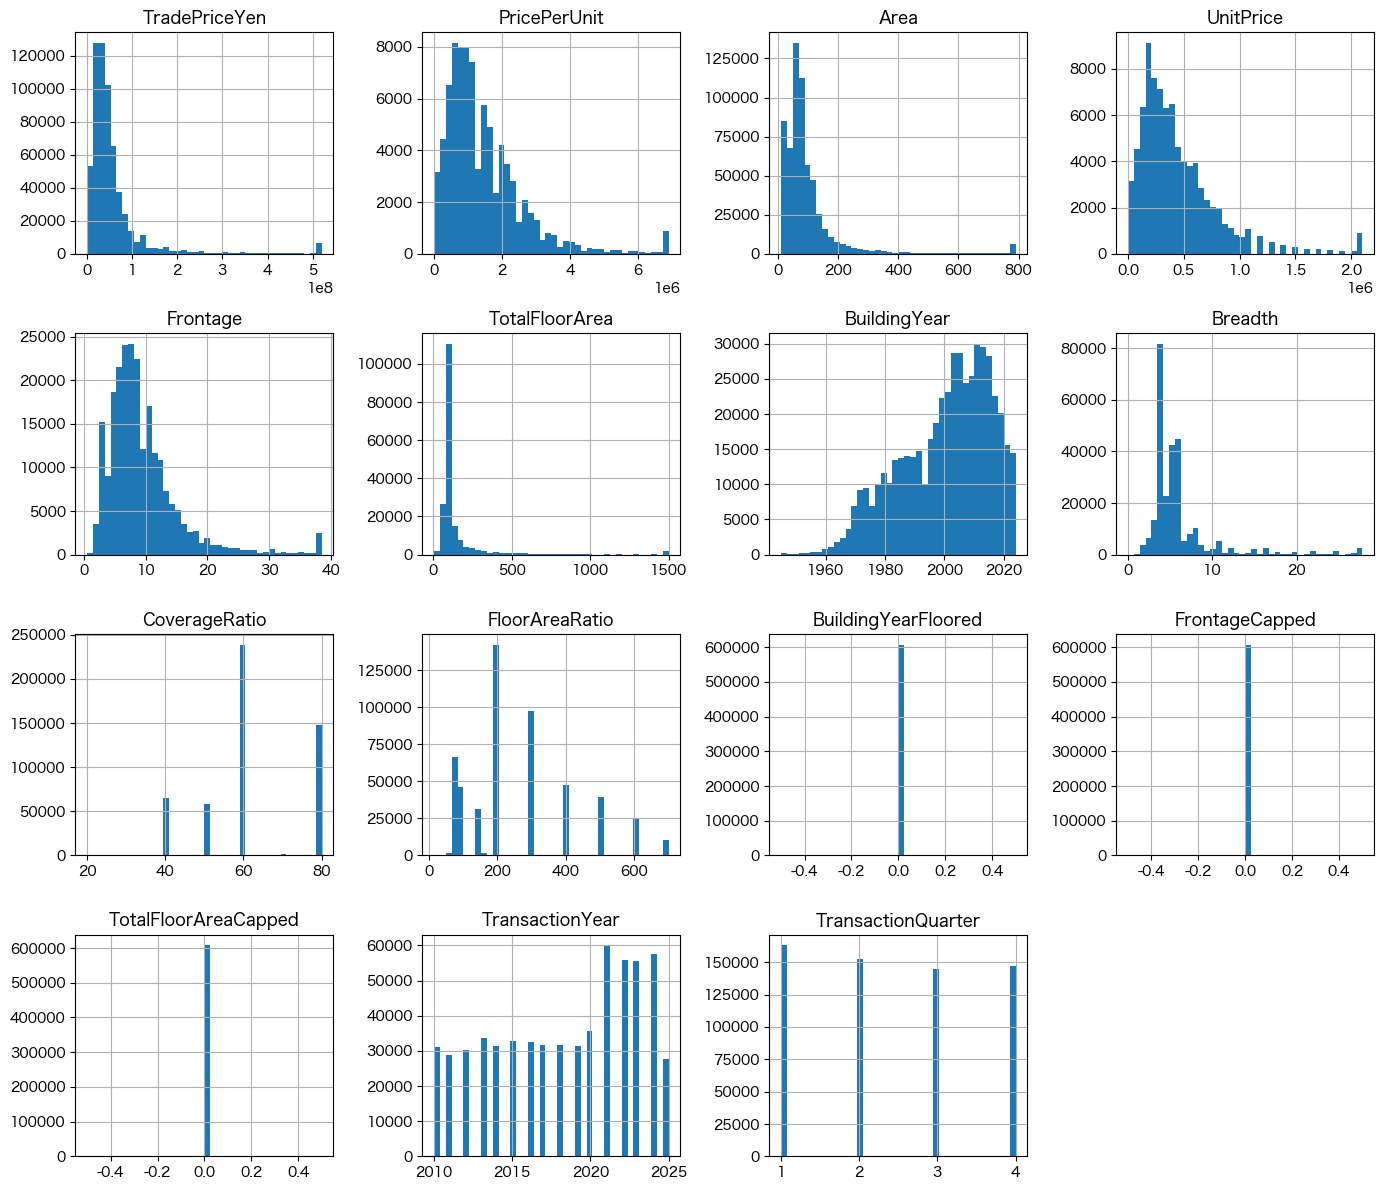

In [11]:
num_cols = data.select_dtypes(include='number').columns

# clip each numeric column at its 99th percentile
clipped = data[num_cols].clip(upper=data[num_cols].quantile(0.99), axis=1)

clipped.hist(figsize=(14, 12), bins=40)
plt.tight_layout()

In [12]:
data.corr(numeric_only=True)

,TradePriceYen,PricePerUnit,Area,UnitPrice,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter
TradePriceYen,1.000000,0.381952,0.254130,0.382847,0.178284,0.375947,0.006355,0.157869,0.031256,0.051114,0.001491,0.177845,0.314785,0.015087,-0.002340
PricePerUnit,0.381952,1.000000,-0.063202,0.999670,-0.045632,NaN,NaN,0.154135,0.329851,0.450837,NaN,-0.041394,NaN,0.164362,-0.009561
Area,0.254130,-0.063202,1.000000,-0.063134,0.553830,0.449220,-0.040531,0.105877,-0.084613,-0.085247,0.004853,0.486353,0.224342,-0.042314,-0.002836
UnitPrice,0.382847,0.999670,-0.063134,1.000000,-0.045489,NaN,NaN,0.154183,0.329505,0.450481,NaN,-0.041262,NaN,0.164258,-0.009513
Frontage,0.178284,-0.045632,0.553830,-0.045489,1.000000,0.292292,-0.044217,0.061170,-0.003900,-0.004717,0.000726,0.999967,0.154350,-0.013248,-0.011827
TotalFloorArea,0.375947,NaN,0.449220,NaN,0.292292,1.000000,-0.094182,0.248529,0.156646,0.234408,0.002794,0.280246,0.973745,-0.028455,-0.007538
BuildingYear,0.006355,NaN,-0.040531,NaN,-0.044217,-0.094182,1.000000,-0.119770,-0.144466,-0.136855,-0.083114,-0.022423,-0.029764,0.117979,-0.006080
Breadth,0.157869,0.154135,0.105877,0.154183,0.061170,0.248529,-0.119770,1.000000,0.260156,0.358687,0.001125,0.059343,0.143519,-0.020019,-0.003420
CoverageRatio,0.031256,0.329851,-0.084613,0.329505,-0.003900,0.156646,-0.144466,0.260156,1.000000,0.821979,0.008802,-0.021179,0.031329,0.013522,0.002478
FloorAreaRatio,0.051114,0.450837,-0.085247,0.450481,-0.004717,0.234408,-0.136855,0.358687,0.821979,1.000000,0.006212,-0.023274,0.044703,-0.002473,0.001799


<Axes: >

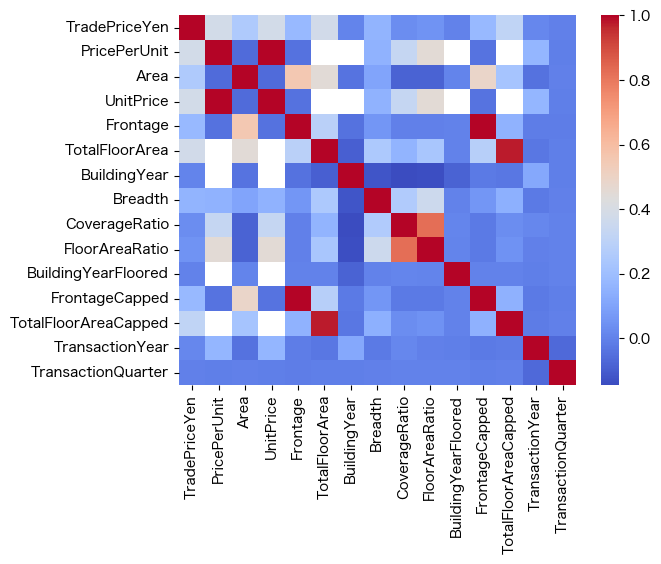

In [13]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')

In [14]:
# Japanese-style 万円 formatter
def yen_man(x, pos):
    return f"{x:,.0f}万円"

# add log trade price
latest_year = data['TransactionYear'].max()

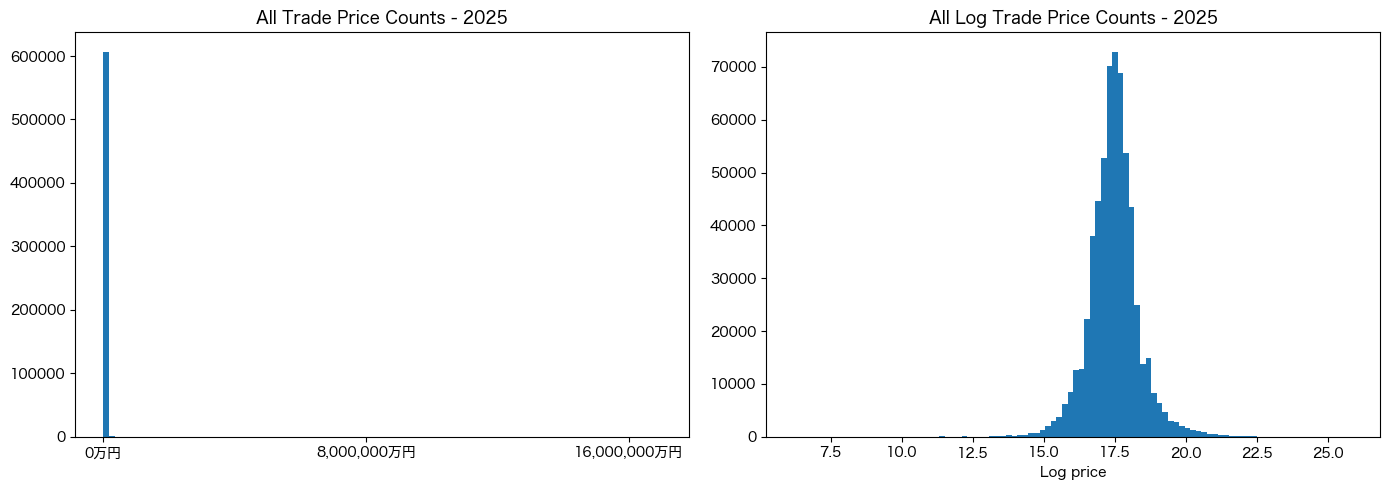

In [15]:
data['LogTradePriceYen'] = np.log(data['TradePriceYen'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear
axes[0].hist(data['TradePriceYen']/1e4, bins=100)
axes[0].set_title(f"All Trade Price Counts - {latest_year}")
axes[0].xaxis.set_major_formatter(FuncFormatter(yen_man))
axes[0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log
axes[1].hist(data['LogTradePriceYen'], bins=100)
axes[1].set_title(f"All Log Trade Price Counts - {latest_year}")
axes[1].set_xlabel("Log price")
plt.tight_layout()

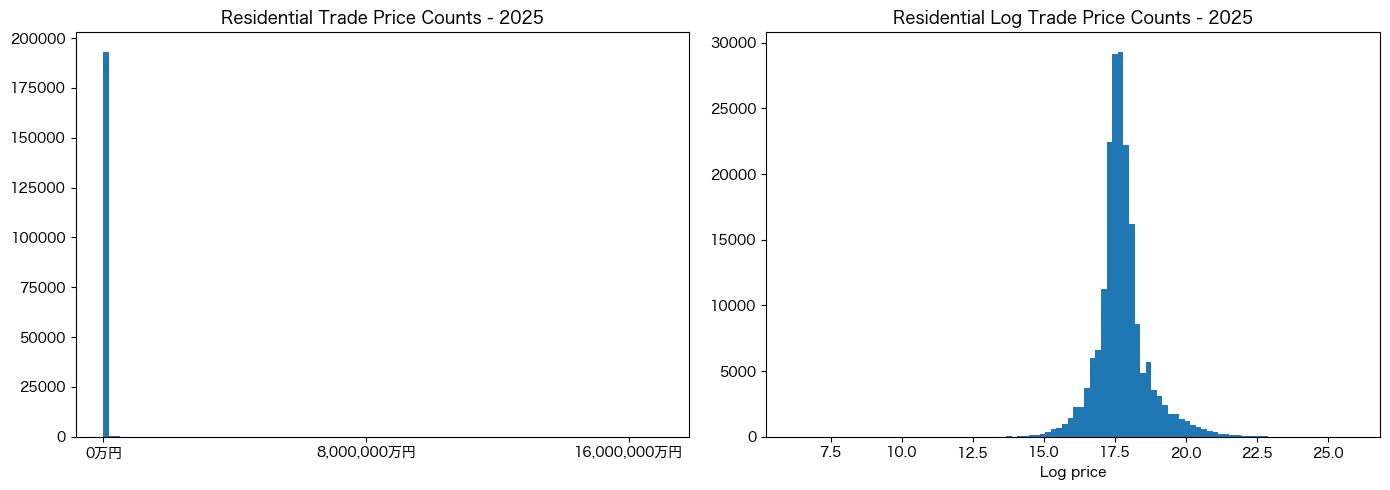

In [16]:
# todo: clip these to remove the outliers that are extending the linear plot

data['LogTradePriceYen'] = np.log(data['TradePriceYen'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear
axes[0].hist(data[data['Type'] == 'Residential Land(Land and Building)']['TradePriceYen']/1e4, bins=100)
axes[0].set_title(f"Residential Trade Price Counts - {latest_year}")
axes[0].xaxis.set_major_formatter(FuncFormatter(yen_man))
axes[0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log
axes[1].hist(data[data['Type'] == 'Residential Land(Land and Building)']['LogTradePriceYen'], bins=100)
axes[1].set_title(f"Residential Log Trade Price Counts - {latest_year}")
axes[1].set_xlabel("Log price")
plt.tight_layout()

Avg Transaction Prices (万円) - Most Expensive Municipalities:
Municipality
千代田区 (Chiyoda Ward)    80090
渋谷区 (Shibuya Ward)     66178
港区 (Minato Ward)       53432
中央区 (Chuo Ward)        49173
台東区 (Taito Ward)       30865
Name: TradePriceYen, dtype: int64

Avg Transaction Prices (万円) - Least Expensive Municipalities:
Municipality
青梅市 (Oume City)                         2545
瑞穂町 (Mizuho Town, Nishitama County)     2480
新島村 (Niijima Village)                   1600
日の出町 (Hinode Town, Nishitama County)    1480
八丈町 (Hachijo Town)                       495
Name: TradePriceYen, dtype: int64



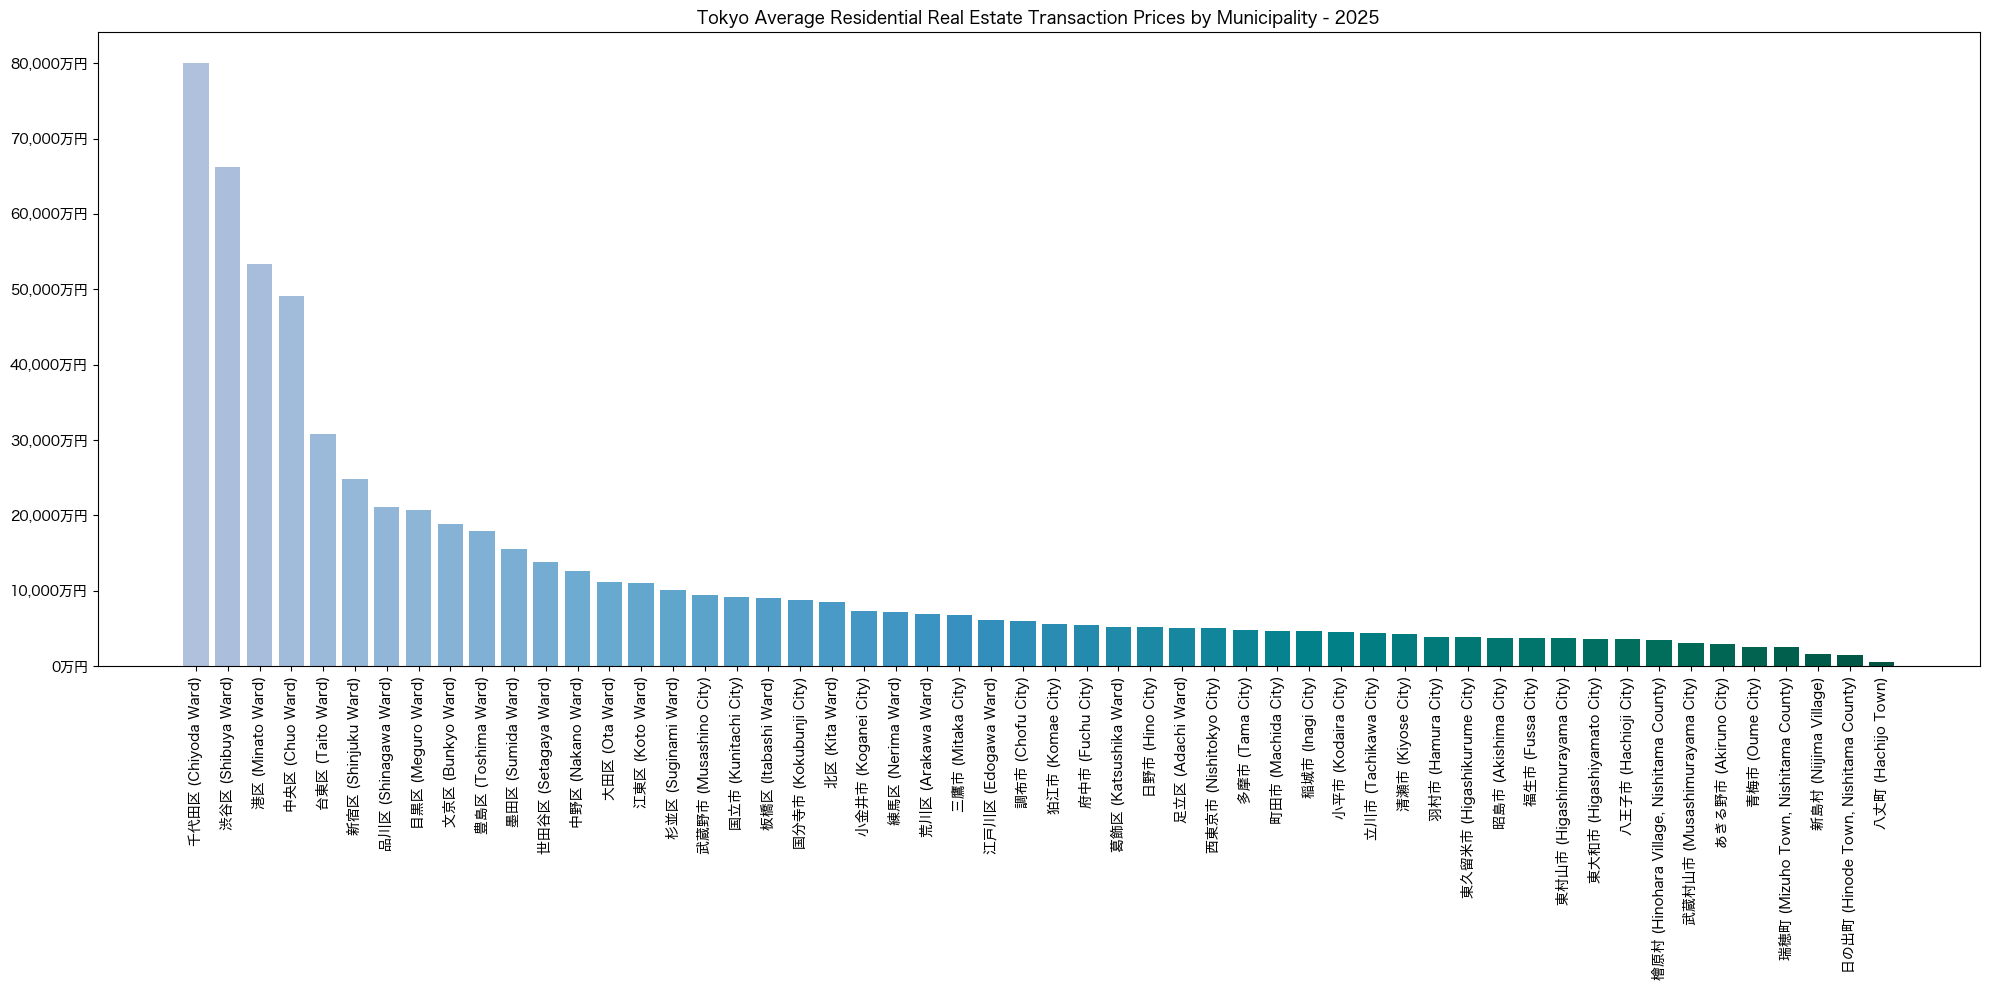

In [17]:
# Sorted average price series in 万円, for residential real estate in the most recent year available
avg_prices_man = (data[(data['Type'] == 'Residential Land(Land and Building)') & (data['TransactionYear'] == latest_year)]
                      .groupby('Municipality')['TradePriceYen']
                      .mean()
                      .sort_values(ascending=False))/1e4

print("Avg Transaction Prices (万円) - Most Expensive Municipalities:")
print(avg_prices_man.head().astype(int))
print()

print("Avg Transaction Prices (万円) - Least Expensive Municipalities:")
print(avg_prices_man.tail().astype(int))
print()


fig, ax = plt.subplots(figsize=(20, 10))
colors = plt.cm.PuBuGn(np.linspace(0.35, 0.95, len(avg_prices_man)))

ax.bar(avg_prices_man.index, avg_prices_man.values, color=colors)
ax.set_title(f"Tokyo Average Residential Real Estate Transaction Prices by Municipality - {latest_year}")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()